In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
customized_path = "/content/drive/Shareddrives/Urban Computing Project/"
sys.path.append(customized_path)

In [ ]:
pip install statsmodels

In [ ]:
# pip install sktime

     |████████████████████████████████| 6.2 MB 4.1 MB/s 
     |████████████████████████████████| 3.3 MB 45.6 MB/s 
     |████████████████████████████████| 14.9 MB 39.9 MB/s 
     |████████████████████████████████| 9.8 MB 40.2 MB/s 
     |████████████████████████████████| 26.3 MB 61.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
ERROR: pip's dependency resolver does not currently take into account

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# Load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dt = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/aggregated_taxi_and_bus_data_with_lid.csv')

In [ ]:
dt.head()

,timekey,locationID,BusesThatReachedStop,BusesThatReachedLate,OnTimeBuses,AvgLeadTime,AvgLateTime,TaxiTripsBookedAtTimeSlot,TaxiAvgFareAtTimeSlot,TaxiAvgPassAtTimeSlot,TaxiTotalFareAtTimeSlot,TaxiAvgTripDistAtTimeSlot,TaxiAvgTripTimeAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiAvgFareAtTMinusFiveSlot,TaxiAvgPassAtTMinusFiveSlot,TaxiTotalFareAtTMinusFiveSlot,TaxiAvgTripDistAtTMinusFiveSlot,TaxiAvgTripTimeAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiAvgFareAtTMinusTenSlot,TaxiAvgPassAtTMinusTenSlot,TaxiTotalFareAtTMinusTenSlot,TaxiAvgTripDistAtTMinusTenlot,TaxiAvgTripTimeAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,TaxiAvgFareAtTMinusFifteenSlot,TaxiAvgPassAtTMinusFifteenSlot,TaxiTotalFareAtTMinusFifteenSlot,TaxiAvgTripDistAtTMinusFifteenSlot,TaxiAvgTripTimeAtTMinusFifteenSlot,TaxiTripsBookedAtTMinusTwentySlot,TaxiAvgFareAtTMinusTwentySlot,TaxiAvgPassAtTMinusTwentySlot,TaxiTotalFareAtTMinusTwentySlot,TaxiAvgTripDistAtTMinusTwentySlot,TaxiAvgTripTimeAtTMinusTwentySlot
0,2017-10-14 08:10:00 UTC,42,1,0,1,1.0,0.0,2,0.000000e+00,1.500000,0.0,0,14.000000,2,0.000000e+00,1.50,0.000000e+00,0,9.00,1,0.0,1.0,0.0,0,8.0,2,0.000000e+00,2.0,0.0,0,8.000000,2,0.000000e+00,2.000000,-1.500000e-08,0,17.5
1,2017-10-15 21:50:00 UTC,125,1,0,1,19.0,0.0,6,-1.400000e-08,1.333333,0.0,0,14.833333,4,-1.000000e-08,1.75,-1.000000e-08,0,14.25,1,0.0,2.0,0.0,0,4.0,6,-7.000000e-09,1.5,0.0,0,12.833333,5,0.000000e+00,1.000000,0.000000e+00,0,6.4
2,2017-10-20 19:10:00 UTC,232,1,0,1,21.0,0.0,1,0.000000e+00,1.000000,0.0,0,8.000000,2,-2.100000e-08,2.50,0.000000e+00,0,20.50,1,0.0,1.0,0.0,0,8.0,4,-2.600000e-08,1.0,0.0,0,35.500000,3,-1.800000e-08,2.333333,0.000000e+00,0,46.0
3,2017-10-25 06:50:00 UTC,209,1,0,1,1.0,0.0,1,-3.700000e-08,1.000000,0.0,0,22.000000,4,-2.100000e-08,1.50,0.000000e+00,0,13.50,1,0.0,1.0,0.0,0,79.0,1,0.000000e+00,1.0,0.0,0,17.000000,3,-3.400000e-08,1.000000,-1.400000e-08,0,25.0
4,2017-10-25 19:30:00 UTC,232,1,0,1,2.0,0.0,3,-8.000000e-09,1.000000,0.0,0,13.000000,2,0.000000e+00,3.00,0.000000e+00,0,16.50,1,0.0,1.0,0.0,0,22.0,2,0.000000e+00,1.5,0.0,0,7.000000,5,0.000000e+00,1.800000,-7.000000e-09,0,10.8


In [ ]:
dt['locationID'].value_counts()

164    15786
107    12140
41     10054
143    10017
238    10012
       ...  
194        1
189        1
135        1
130        1
215        1
Name: locationID, Length: 98, dtype: int64

In [ ]:
dt['timekey'] = pd.to_datetime(dt['timekey'], errors = 'coerce')

In [ ]:
dt['day'] = dt['timekey'].dt.dayofweek
dt['date'] = dt['timekey'].dt.date
dt['hour'] = dt['timekey'].dt.hour
dt['weekday'] = dt['timekey'].dt.weekday

In [ ]:
dt.head()

,timekey,locationID,BusesThatReachedStop,BusesThatReachedLate,OnTimeBuses,AvgLeadTime,AvgLateTime,TaxiTripsBookedAtTimeSlot,TaxiAvgFareAtTimeSlot,TaxiAvgPassAtTimeSlot,TaxiTotalFareAtTimeSlot,TaxiAvgTripDistAtTimeSlot,TaxiAvgTripTimeAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiAvgFareAtTMinusFiveSlot,TaxiAvgPassAtTMinusFiveSlot,TaxiTotalFareAtTMinusFiveSlot,TaxiAvgTripDistAtTMinusFiveSlot,TaxiAvgTripTimeAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiAvgFareAtTMinusTenSlot,TaxiAvgPassAtTMinusTenSlot,TaxiTotalFareAtTMinusTenSlot,TaxiAvgTripDistAtTMinusTenlot,TaxiAvgTripTimeAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,TaxiAvgFareAtTMinusFifteenSlot,TaxiAvgPassAtTMinusFifteenSlot,TaxiTotalFareAtTMinusFifteenSlot,TaxiAvgTripDistAtTMinusFifteenSlot,TaxiAvgTripTimeAtTMinusFifteenSlot,TaxiTripsBookedAtTMinusTwentySlot,TaxiAvgFareAtTMinusTwentySlot,TaxiAvgPassAtTMinusTwentySlot,TaxiTotalFareAtTMinusTwentySlot,TaxiAvgTripDistAtTMinusTwentySlot,TaxiAvgTripTimeAtTMinusTwentySlot,day,date,hour,weekday
0,2017-10-14 08:10:00+00:00,42,1,0,1,1.0,0.0,2,0.000000e+00,1.500000,0.0,0,14.000000,2,0.000000e+00,1.50,0.000000e+00,0,9.00,1,0.0,1.0,0.0,0,8.0,2,0.000000e+00,2.0,0.0,0,8.000000,2,0.000000e+00,2.000000,-1.500000e-08,0,17.5,5,2017-10-14,8,5
1,2017-10-15 21:50:00+00:00,125,1,0,1,19.0,0.0,6,-1.400000e-08,1.333333,0.0,0,14.833333,4,-1.000000e-08,1.75,-1.000000e-08,0,14.25,1,0.0,2.0,0.0,0,4.0,6,-7.000000e-09,1.5,0.0,0,12.833333,5,0.000000e+00,1.000000,0.000000e+00,0,6.4,6,2017-10-15,21,6
2,2017-10-20 19:10:00+00:00,232,1,0,1,21.0,0.0,1,0.000000e+00,1.000000,0.0,0,8.000000,2,-2.100000e-08,2.50,0.000000e+00,0,20.50,1,0.0,1.0,0.0,0,8.0,4,-2.600000e-08,1.0,0.0,0,35.500000,3,-1.800000e-08,2.333333,0.000000e+00,0,46.0,4,2017-10-20,19,4
3,2017-10-25 06:50:00+00:00,209,1,0,1,1.0,0.0,1,-3.700000e-08,1.000000,0.0,0,22.000000,4,-2.100000e-08,1.50,0.000000e+00,0,13.50,1,0.0,1.0,0.0,0,79.0,1,0.000000e+00,1.0,0.0,0,17.000000,3,-3.400000e-08,1.000000,-1.400000e-08,0,25.0,2,2017-10-25,6,2
4,2017-10-25 19:30:00+00:00,232,1,0,1,2.0,0.0,3,-8.000000e-09,1.000000,0.0,0,13.000000,2,0.000000e+00,3.00,0.000000e+00,0,16.50,1,0.0,1.0,0.0,0,22.0,2,0.000000e+00,1.5,0.0,0,7.000000,5,0.000000e+00,1.800000,-7.000000e-09,0,10.8,2,2017-10-25,19,2


In [ ]:
def weekend(var):
  if var>4:
    return 'weekend'
  else:
    return 'weekday'

In [ ]:
dt['WeekendOrNot'] = dt['weekday'].apply(weekend)

In [ ]:
dt.head()

,timekey,locationID,BusesThatReachedStop,BusesThatReachedLate,OnTimeBuses,AvgLeadTime,AvgLateTime,TaxiTripsBookedAtTimeSlot,TaxiAvgFareAtTimeSlot,TaxiAvgPassAtTimeSlot,TaxiTotalFareAtTimeSlot,TaxiAvgTripDistAtTimeSlot,TaxiAvgTripTimeAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiAvgFareAtTMinusFiveSlot,TaxiAvgPassAtTMinusFiveSlot,TaxiTotalFareAtTMinusFiveSlot,TaxiAvgTripDistAtTMinusFiveSlot,TaxiAvgTripTimeAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiAvgFareAtTMinusTenSlot,TaxiAvgPassAtTMinusTenSlot,TaxiTotalFareAtTMinusTenSlot,TaxiAvgTripDistAtTMinusTenlot,TaxiAvgTripTimeAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,TaxiAvgFareAtTMinusFifteenSlot,TaxiAvgPassAtTMinusFifteenSlot,TaxiTotalFareAtTMinusFifteenSlot,TaxiAvgTripDistAtTMinusFifteenSlot,TaxiAvgTripTimeAtTMinusFifteenSlot,TaxiTripsBookedAtTMinusTwentySlot,TaxiAvgFareAtTMinusTwentySlot,TaxiAvgPassAtTMinusTwentySlot,TaxiTotalFareAtTMinusTwentySlot,TaxiAvgTripDistAtTMinusTwentySlot,TaxiAvgTripTimeAtTMinusTwentySlot,day,date,hour,weekday,WeekendOrNot
0,2017-10-14 08:10:00+00:00,42,1,0,1,1.0,0.0,2,0.000000e+00,1.500000,0.0,0,14.000000,2,0.000000e+00,1.50,0.000000e+00,0,9.00,1,0.0,1.0,0.0,0,8.0,2,0.000000e+00,2.0,0.0,0,8.000000,2,0.000000e+00,2.000000,-1.500000e-08,0,17.5,5,2017-10-14,8,5,weekend
1,2017-10-15 21:50:00+00:00,125,1,0,1,19.0,0.0,6,-1.400000e-08,1.333333,0.0,0,14.833333,4,-1.000000e-08,1.75,-1.000000e-08,0,14.25,1,0.0,2.0,0.0,0,4.0,6,-7.000000e-09,1.5,0.0,0,12.833333,5,0.000000e+00,1.000000,0.000000e+00,0,6.4,6,2017-10-15,21,6,weekend
2,2017-10-20 19:10:00+00:00,232,1,0,1,21.0,0.0,1,0.000000e+00,1.000000,0.0,0,8.000000,2,-2.100000e-08,2.50,0.000000e+00,0,20.50,1,0.0,1.0,0.0,0,8.0,4,-2.600000e-08,1.0,0.0,0,35.500000,3,-1.800000e-08,2.333333,0.000000e+00,0,46.0,4,2017-10-20,19,4,weekday
3,2017-10-25 06:50:00+00:00,209,1,0,1,1.0,0.0,1,-3.700000e-08,1.000000,0.0,0,22.000000,4,-2.100000e-08,1.50,0.000000e+00,0,13.50,1,0.0,1.0,0.0,0,79.0,1,0.000000e+00,1.0,0.0,0,17.000000,3,-3.400000e-08,1.000000,-1.400000e-08,0,25.0,2,2017-10-25,6,2,weekday
4,2017-10-25 19:30:00+00:00,232,1,0,1,2.0,0.0,3,-8.000000e-09,1.000000,0.0,0,13.000000,2,0.000000e+00,3.00,0.000000e+00,0,16.50,1,0.0,1.0,0.0,0,22.0,2,0.000000e+00,1.5,0.0,0,7.000000,5,0.000000e+00,1.800000,-7.000000e-09,0,10.8,2,2017-10-25,19,2,weekday


In [ ]:
dt1 = dt[dt['locationID'] == 164]

In [ ]:
dt2 = dt1.filter(['AvgLateTime','BusesThatReachedLate', 'TaxiTripsBookedAtTMinusTenSlot', 'day', 'date', 'hour', 'WeekendOrNot'], axis =1)

In [ ]:
dt2

,AvgLateTime,BusesThatReachedLate,TaxiTripsBookedAtTMinusTenSlot,day,date,hour,WeekendOrNot
28,0.0,0,1,6,2017-12-24,6,weekend
158,0.0,0,1,1,2017-08-29,3,weekday
220,0.0,0,1,1,2017-10-31,4,weekday
301,0.0,0,1,0,2017-08-14,3,weekday
408,0.0,0,1,0,2017-12-11,2,weekday
...,...,...,...,...,...,...,...
229335,2.0,3,8,6,2017-10-01,8,weekend
229336,2.0,3,15,4,2017-06-30,7,weekday
229337,2.0,3,23,4,2017-10-20,7,weekday
229338,2.0,2,32,0,2017-12-18,12,weekday


In [ ]:
dt2['hour'].value_counts()

14    755
16    748
9     745
13    744
8     741
11    740
15    735
12    734
10    732
19    731
17    729
18    727
20    725
7     715
6     711
21    707
22    669
23    635
5     618
0     586
4     487
1     410
3     343
2     319
Name: hour, dtype: int64

In [ ]:
dt3 = dt2[dt2['hour'] == 9]

In [ ]:
dt3

,AvgLateTime,BusesThatReachedLate,TaxiTripsBookedAtTMinusTenSlot,day,date,hour,WeekendOrNot
9739,0.00,0,5,0,2017-12-25,9,weekday
10435,0.00,0,5,6,2017-12-31,9,weekend
12244,0.00,0,6,6,2017-06-18,9,weekend
13768,0.00,0,7,5,2017-06-17,9,weekend
14660,0.00,0,7,0,2017-12-25,9,weekday
...,...,...,...,...,...,...,...
229251,6.25,4,21,3,2017-12-21,9,weekday
229258,6.50,6,30,3,2017-10-19,9,weekday
229295,7.75,3,27,2,2017-06-21,9,weekday
229316,16.00,6,26,1,2017-10-24,9,weekday


In [ ]:
dt3['date'] = pd.to_datetime(dt3['date'], errors = 'coerce')

,AvgLateTime,BusesThatReachedLate,TaxiTripsBookedAtTMinusTenSlot,day,date,hour,WeekendOrNot
9739,0.0,0,5,0,2017-12-25,9,weekday
10435,0.0,0,5,6,2017-12-31,9,weekend
12244,0.0,0,6,6,2017-06-18,9,weekend
13768,0.0,0,7,5,2017-06-17,9,weekend
14660,0.0,0,7,0,2017-12-25,9,weekday


In [ ]:
dt3 = dt3.sort_values(by='date')

In [ ]:
df = dt3.set_index(['date']).drop(['day', 'hour'], axis=1)

In [ ]:
df.head()

,AvgLateTime,BusesThatReachedLate,TaxiTripsBookedAtTMinusTenSlot,WeekendOrNot
date,,,,
2017-06-01,3.0,1,32,weekday
2017-06-01,0.0,0,28,weekday
2017-06-01,3.0,3,35,weekday
2017-06-01,1.5,1,29,weekday
2017-06-01,6.0,2,28,weekday


In [ ]:
df_avg = df.groupby(['date']).sum()

In [ ]:
df_avg.head()

,AvgLateTime,BusesThatReachedLate,TaxiTripsBookedAtTMinusTenSlot
date,,,
2017-06-01,15.500000,9,188
2017-06-02,23.750000,12,184
2017-06-03,24.333333,11,87
2017-06-04,40.833333,16,79
2017-06-05,47.750000,12,156


# VAR

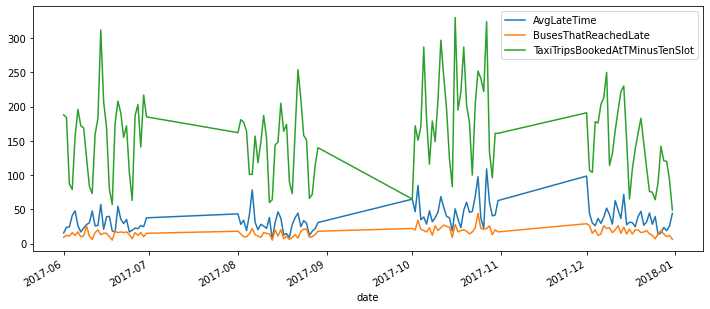

In [ ]:
df_avg.plot(figsize=(12, 5))

In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df_avg['AvgLateTime'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.496921
p-value                   0.000199
# lags used               2.000000
# observations          118.000000
critical value (1%)      -3.487022
critical value (5%)      -2.886363
critical value (10%)     -2.580009
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df_avg['BusesThatReachedLate'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.513442
p-value                   0.526851
# lags used               7.000000
# observations          113.000000
critical value (1%)      -3.489590
critical value (5%)      -2.887477
critical value (10%)     -2.580604
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
adf_test(df_avg['TaxiTripsBookedAtTMinusTenSlot'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.372888
p-value                   0.595203
# lags used              10.000000
# observations          110.000000
critical value (1%)      -3.491245
critical value (5%)      -2.888195
critical value (10%)     -2.580988
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
df_transformed = df_avg.diff()

In [ ]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['BusesThatReachedLate'], title='LateBuses')
print()
adf_test(df_transformed['TaxiTripsBookedAtTMinusTenSlot'], title='TaxiBookings')

Augmented Dickey-Fuller Test: LateBuses
ADF test statistic     -7.692066e+00
p-value                 1.410635e-11
# lags used             6.000000e+00
# observations          1.130000e+02
critical value (1%)    -3.489590e+00
critical value (5%)    -2.887477e+00
critical value (10%)   -2.580604e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: TaxiBookings
ADF test statistic       -5.537190
p-value                   0.000002
# lags used               9.000000
# observations          110.000000
critical value (1%)      -3.491245
critical value (5%)      -2.888195
critical value (10%)     -2.580988
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
len(df_transformed)

120

# Test-Train Split

In [ ]:
d = 30
train, test = df_transformed[0:-d], df_transformed[-d:]

In [ ]:
print(train.shape)
print(test.shape)

(90, 3)
(30, 3)


# VAR Model Order Selection

We'll fit a series of models using the first eight p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [ ]:
for i in range(10):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  18.469405410245624
BIC:  18.552732399256634

Order = 1
AIC:  18.12691271499429
BIC:  18.46245919181211

Order = 2
AIC:  17.936756467829937
BIC:  18.52793911673951

Order = 3
AIC:  17.838850378202018
BIC:  18.689163522565668

Order = 4
AIC:  17.790347917250195
BIC:  18.903365877179112

Order = 5
AIC:  17.749092853556387
BIC:  19.128472386633273

Order = 6
AIC:  17.52150141602282
BIC:  19.17098424380935

Order = 7
AIC:  17.514169466511976
BIC:  19.437584889579153

Order = 8
AIC:  17.509221281731673
BIC:  19.710488885936783

Order = 9
AIC:  17.718538471480766
BIC:  20.20167092817811



The VAR(8) model seems to return the lowest combined scores.
Just to verify that all three variables are included in the model we can run .endog_names

In [ ]:
model.endog_names

['AvgLateTime', 'BusesThatReachedLate', 'TaxiTripsBookedAtTMinusTenSlot']

# Fitting VAR Model

In [ ]:
results = model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 11, Dec, 2021
Time:                     08:27:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.7105
Nobs:                     82.0000    HQIC:                   18.3930
Log likelihood:          -991.937    FPE:                4.26819e+07
AIC:                      17.5092    Det(Omega_mle):     1.92103e+07
--------------------------------------------------------------------
Results for equation AvgLateTime
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     2.738016         2.041175            1.341           0.180
L1.AvgLateTime                           -0.659649         0.154559        

# Predict the next 30 values

In [ ]:
lag_order = results.k_ar
lag_order

8

In [ ]:
z = results.forecast(y=train.values[-lag_order:], steps=30)
z

array([[-4.90051968e-01,  2.42983013e+00,  4.24368506e+01],
       [-5.00061981e+01, -6.77332612e+00, -4.62899648e+01],
       [ 2.67016090e+01,  1.57350158e+00, -2.43443945e+01],
       [-3.62565110e+00, -6.04190429e+00,  1.66795711e+01],
       [-3.51664955e+00,  6.47581868e+00, -1.91785727e+00],
       [-4.32356288e+00, -5.27841985e+00, -3.27041019e+01],
       [-1.10582976e+00,  1.54059987e-02,  1.00064229e+01],
       [ 1.11668805e+01,  1.48828432e+00,  2.80212963e+01],
       [ 2.14972648e+01,  8.72961559e+00,  1.38372417e+01],
       [-1.68587258e+01, -6.79096341e+00, -1.72591184e+00],
       [-1.25720311e+01,  1.28016272e-01, -3.11084903e+01],
       [ 8.65575185e+00,  4.27850839e-01,  2.68901771e+01],
       [ 5.93675054e+00,  9.57837250e-01, -5.38902239e+00],
       [-6.57481564e+00, -2.42081091e+00, -2.66888081e+01],
       [-4.79871087e+00,  6.84092632e-01,  8.98182265e+00],
       [ 8.18343748e+00, -1.54462845e-02,  1.75553402e+01],
       [ 6.53440606e+00,  2.12034788e+00

In [ ]:
idx = pd.date_range('2017/12/02', periods=30, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['AvgLateTime1D', 'BusesThatReachedLate1D', 'TaxiTripsBookedAtTMinusTenSlot1D'])
df_forecast 

,AvgLateTime1D,BusesThatReachedLate1D,TaxiTripsBookedAtTMinusTenSlot1D
2017-12-02,-0.490052,2.429830,42.436851
2017-12-03,-50.006198,-6.773326,-46.289965
2017-12-04,26.701609,1.573502,-24.344395
2017-12-05,-3.625651,-6.041904,16.679571
2017-12-06,-3.516650,6.475819,-1.917857
2017-12-07,-4.323563,-5.278420,-32.704102
2017-12-08,-1.105830,0.015406,10.006423
2017-12-09,11.166880,1.488284,28.021296
2017-12-10,21.497265,8.729616,13.837242
2017-12-11,-16.858726,-6.790963,-1.725912


In [ ]:
df_forecast['AvgLateTimeForecast'] = df_avg['AvgLateTime'].iloc[-d-1] + df_forecast['AvgLateTime1D'].cumsum()
df_forecast['BusesThatReachedLateForecast'] = df_avg['BusesThatReachedLate'].iloc[-d-1] + df_forecast['BusesThatReachedLate1D'].cumsum()
df_forecast['TaxiTripsBookedAtTMinusTenSlotForecast'] = df_avg['TaxiTripsBookedAtTMinusTenSlot'].iloc[-d-1] + df_forecast['TaxiTripsBookedAtTMinusTenSlot1D'].cumsum()

In [ ]:
df_forecast

,AvgLateTime1D,BusesThatReachedLate1D,TaxiTripsBookedAtTMinusTenSlot1D,AvgLateTimeForecast,BusesThatReachedLateForecast,TaxiTripsBookedAtTMinusTenSlotForecast
2017-12-02,-0.490052,2.429830,42.436851,98.052012,31.429830,233.436851
2017-12-03,-50.006198,-6.773326,-46.289965,48.045813,24.656504,187.146886
2017-12-04,26.701609,1.573502,-24.344395,74.747422,26.230006,162.802491
2017-12-05,-3.625651,-6.041904,16.679571,71.121771,20.188101,179.482062
2017-12-06,-3.516650,6.475819,-1.917857,67.605122,26.663920,177.564205
2017-12-07,-4.323563,-5.278420,-32.704102,63.281559,21.385500,144.860103
2017-12-08,-1.105830,0.015406,10.006423,62.175729,21.400906,154.866526
2017-12-09,11.166880,1.488284,28.021296,73.342610,22.889190,182.887822
2017-12-10,21.497265,8.729616,13.837242,94.839874,31.618806,196.725064
2017-12-11,-16.858726,-6.790963,-1.725912,77.981149,24.827843,194.999152


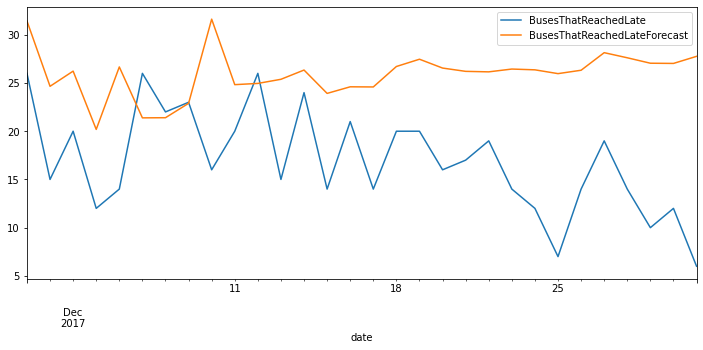

In [ ]:
df_avg['BusesThatReachedLate'][-d:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['BusesThatReachedLateForecast'].plot(legend=True);

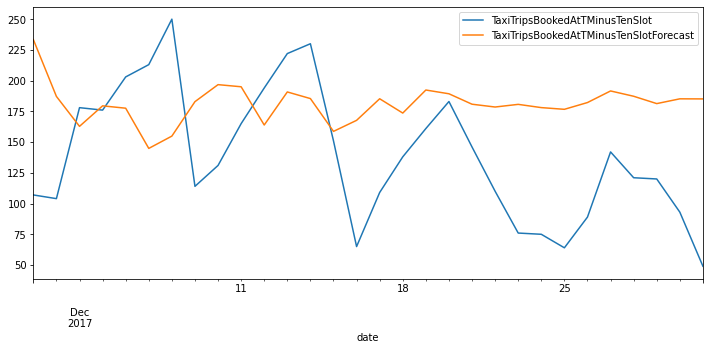

In [ ]:
df_avg['TaxiTripsBookedAtTMinusTenSlot'][-d:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['TaxiTripsBookedAtTMinusTenSlotForecast'].plot(legend=True);

# Evaluate the model

Using Root Mean Square Error

In [ ]:
RMSE1 = rmse(df_avg['BusesThatReachedLate'][-d:], df_forecast['BusesThatReachedLateForecast'])
print(f' VAR(8) RMSE: {RMSE1:.3f}')

 VAR(8) RMSE: 10.795


In [ ]:
RMSE2 = rmse(df_avg['TaxiTripsBookedAtTMinusTenSlot'][-d:], df_forecast['TaxiTripsBookedAtTMinusTenSlotForecast'])
print(f'TaxiTripsBookedAtTMinusTenSlot VAR(8) RMSE: {RMSE2:.3f}')

TaxiTripsBookedAtTMinusTenSlot VAR(8) RMSE: 72.231


# VAR Compared with AR(8)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg,ARResults

In [ ]:
modelM = AutoReg(train['BusesThatReachedLate'], lags = 8)
AR8fit1 = modelM.fit()
print(f'Coefficients:\n{AR8fit1.params}')

Coefficients:
const                      0.479329
BusesThatReachedLate.L1   -0.844104
BusesThatReachedLate.L2   -0.727528
BusesThatReachedLate.L3   -0.797164
BusesThatReachedLate.L4   -0.560394
BusesThatReachedLate.L5   -0.634073
BusesThatReachedLate.L6   -0.582063
BusesThatReachedLate.L7   -0.365763
BusesThatReachedLate.L8   -0.172158
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
z = pd.DataFrame(AR8fit1.predict(start=start, end=end, dynamic=False),columns=['BusesThatReachedLate'])

In [ ]:
z

,BusesThatReachedLate
90,-4.727484
91,-0.070693
92,-2.413305
93,1.505758
94,-2.515311
95,-0.624553
96,1.912378
97,1.715364
98,0.837174
99,-1.036479


In [ ]:
z['BusesThatReachedLateForecast'] = df_avg['BusesThatReachedLate'].iloc[-d-1] + z['BusesThatReachedLate'].cumsum()

In [ ]:
z

,BusesThatReachedLate,BusesThatReachedLateForecast
90,-4.727484,24.272516
91,-0.070693,24.201823
92,-2.413305,21.788517
93,1.505758,23.294276
94,-2.515311,20.778965
95,-0.624553,20.154412
96,1.912378,22.066790
97,1.715364,23.782155
98,0.837174,24.619328
99,-1.036479,23.582849


In [ ]:
df_avg['BusesThatReachedLate'][-d:]

date
2017-12-02    26
2017-12-03    15
2017-12-04    20
2017-12-05    12
2017-12-06    14
2017-12-07    26
2017-12-08    22
2017-12-09    23
2017-12-10    16
2017-12-11    20
2017-12-12    26
2017-12-13    15
2017-12-14    24
2017-12-15    14
2017-12-16    21
2017-12-17    14
2017-12-18    20
2017-12-19    20
2017-12-20    16
2017-12-21    17
2017-12-22    19
2017-12-23    14
2017-12-24    12
2017-12-25     7
2017-12-26    14
2017-12-27    19
2017-12-28    14
2017-12-29    10
2017-12-30    12
2017-12-31     6
Name: BusesThatReachedLate, dtype: int64

In [ ]:
RMSE3 = rmse(df_avg['BusesThatReachedLate'][-d:], z['BusesThatReachedLateForecast'])

print(f'Money VAR(8) RMSE: {RMSE1:.3f}')
print(f'Money  AR(8) RMSE: {RMSE3:.3f}')

Money VAR(8) RMSE: 72.231
Money  AR(8) RMSE: 8.747
